In [51]:
import time
from src.method_selector import MlMethodSelector, ClassicMethodSelector
from src.measurement_provider import MeasurementProvider
from src.serializer import SenMLCBORSerializer, SenMLJSONSerializer
from src.signal_generator import SignalGenerator
from sys import getsizeof
from src.metric import FeatureMetricEnum, SimilarityMetricEnum
from src.data_type import Measurement
import pandas as pd
import matplotlib as plt
from src.metric import SimilarityMetricEnum
import random
plt.rcParams["figure.dpi"] = 150
pd.set_option('display.max_columns', None)

In [52]:
def compute_sizes(dataset, compressed_data, metrics):
  sendt_cbor_size_original = getsizeof(SenMLCBORSerializer.serialize(dataset, '/72/', '1/2', metrics))
  sendt_cbor_size_compressed = getsizeof(SenMLCBORSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  sendt_cbor_size_diff = sendt_cbor_size_original - sendt_cbor_size_compressed
  sendt_cbor_size_ratio = sendt_cbor_size_diff / sendt_cbor_size_original

  sendt_json_size_original = getsizeof(SenMLJSONSerializer.serialize(dataset, '/72/', '1/2', metrics))
  sendt_json_size_compressed = getsizeof(SenMLJSONSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  sendt_json_size_diff = sendt_json_size_original - sendt_json_size_compressed
  sendt_json_size_ratio = sendt_json_size_diff / sendt_json_size_original
  return {
    'sendt_cbor_size_original': sendt_cbor_size_original,
    'sendt_cbor_size_compressed': sendt_cbor_size_compressed,
    'sendt_cbor_size_diff': sendt_cbor_size_diff,
    'sendt_cbor_size_ratio': sendt_cbor_size_ratio,

    'sendt_json_size_original': sendt_json_size_original,
    'sendt_json_size_compressed': sendt_json_size_compressed,
    'sendt_json_size_diff': sendt_json_size_diff,
    'sendt_json_size_ratio': sendt_json_size_ratio,
  }

def current_milis():
  return time.time() * 1000
  
def run_measurements(dataset, get_measurements):
  dt_method_selector = MlMethodSelector()
  # dt_method_selector.use_default_strategy([
  #   SimilarityMetricEnum.arithmetic_average,
  #   SimilarityMetricEnum.median,
  #   SimilarityMetricEnum.covariance,
  # ])
  dt_method_selector.set_measurements(dataset)
  score = dt_method_selector.train()
  print("dt_method_selector", score)

  rf_method_selector = MlMethodSelector()
  rf_method_selector.set_measurements(dataset)
  score = rf_method_selector.train(True)
  print("rf_method_selector", score)

  naive_method_selector = ClassicMethodSelector()

  print("datasize,dt_time,naive_time,dt_compressed_size,naive_compressed_size,dt_compression_ratio,naive_compression_ratio,dt_method,naive_method,dt_score,naive_score,dt_cbor_original_size,dt_cbor_compressed_size,dt_cbor_compressratio,naive_cbor_original_size,naive_cbor_compressed_size,naive_cbor_compressratio,dt_json_original_size,dt_json_compressed_size,dt_json_compressratio,naive_json_original_size,naive_json_compressed_size,naive_json_compressratio")

  results = {
    "datasize": [],
    "dt_time": [],
    "rf_time": [],
    "naive_time": [],
    "dt_compressed_size": [],
    "rf_compressed_size": [],
    "naive_compressed_size": [],
    "dt_compression_ratio": [],
    "rf_compression_ratio": [],
    "naive_compression_ratio": [],
    "dt_method": [],
    "rf_method": [],
    "naive_method": [],
    "dt_score": [],
    "rf_score": [],
    "naive_score": [],
    "dt_cbor_original_size": [],
    "dt_cbor_compressed_size": [],
    "dt_cbor_compressratio": [],
    "rf_cbor_original_size": [],
    "rf_cbor_compressed_size": [],
    "rf_cbor_compressratio": [],
    "naive_cbor_original_size": [],
    "naive_cbor_compressed_size": [],
    "naive_cbor_compressratio": [],
    "dt_json_original_size": [],
    "dt_json_compressed_size": [],
    "dt_json_compressratio": [],
    "rf_json_original_size": [],
    "rf_json_compressed_size": [],
    "rf_json_compressratio": [],
    "naive_json_original_size": [],
    "naive_json_compressed_size": [],
    "naive_json_compressratio": [],
  }

  for datasize in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    # measurements = measurement_provider.to_measurements(SignalGenerator(0, datasize).with_peaks(3).with_peaks(3, direction=-1).sin(0.2, 0.2))
    measurements = get_measurements(datasize)

    time_start = current_milis()
    compressed_data, stats, metrics = dt_method_selector.compress_with_best(measurements)
    # print("ML")
    # print(metrics)
    time_end = current_milis()
    serialized_data_stats = compute_sizes(measurements, compressed_data, metrics)
    metrics_score = ClassicMethodSelector().compute_similarity_with_default_strategy(measurements, compressed_data)

    dt_time = time_end - time_start
    dt_compressed_size = stats['compressed_size']
    dt_compression_ratio = stats['compression_rate'] * 100
    dt_method = stats['method_name']
    dt_score = metrics_score
    dt_cbor_original_size = serialized_data_stats['sendt_cbor_size_original']
    dt_cbor_compressed_size = serialized_data_stats['sendt_cbor_size_compressed']
    dt_cbor_compressratio = serialized_data_stats['sendt_cbor_size_ratio']
    dt_json_original_size = serialized_data_stats['sendt_json_size_original']
    dt_json_compressed_size = serialized_data_stats['sendt_json_size_compressed']
    dt_json_compressratio = serialized_data_stats['sendt_json_size_ratio']

    results['datasize'].append(datasize);
    results['dt_time'].append(dt_time);
    results['dt_compressed_size'].append(dt_compressed_size);
    results['dt_compression_ratio'].append(dt_compression_ratio);
    results['dt_method'].append(dt_method);
    results['dt_score'].append(dt_score);
    results['dt_cbor_original_size'].append(dt_cbor_original_size);
    results['dt_cbor_compressed_size'].append(dt_cbor_compressed_size);
    results['dt_cbor_compressratio'].append(dt_cbor_compressratio);
    results['dt_json_original_size'].append(dt_json_original_size);
    results['dt_json_compressed_size'].append(dt_json_compressed_size);
    results['dt_json_compressratio'].append(dt_json_compressratio);

    ##############################################

    time_start = current_milis()
    compressed_data, stats, metrics = rf_method_selector.compress_with_best(measurements)
    time_end = current_milis()
    serialized_data_stats = compute_sizes(measurements, compressed_data, metrics)
    metrics_score = ClassicMethodSelector().compute_similarity_with_default_strategy(measurements, compressed_data)

    rf_time = time_end - time_start
    rf_compressed_size = stats['compressed_size']
    rf_compression_ratio = stats['compression_rate'] * 100
    rf_method = stats['method_name']
    rf_score = metrics_score
    rf_cbor_original_size = serialized_data_stats['sendt_cbor_size_original']
    rf_cbor_compressed_size = serialized_data_stats['sendt_cbor_size_compressed']
    rf_cbor_compressratio = serialized_data_stats['sendt_cbor_size_ratio']
    rf_json_original_size = serialized_data_stats['sendt_json_size_original']
    rf_json_compressed_size = serialized_data_stats['sendt_json_size_compressed']
    rf_json_compressratio = serialized_data_stats['sendt_json_size_ratio']

    results['rf_time'].append(rf_time)
    results['rf_compressed_size'].append(rf_compressed_size)
    results['rf_compression_ratio'].append(rf_compression_ratio)
    results['rf_method'].append(rf_method)
    results['rf_score'].append(rf_score)
    results['rf_cbor_original_size'].append(rf_cbor_original_size)
    results['rf_cbor_compressed_size'].append(rf_cbor_compressed_size)
    results['rf_cbor_compressratio'].append(rf_cbor_compressratio)
    results['rf_json_original_size'].append(rf_json_original_size)
    results['rf_json_compressed_size'].append(rf_json_compressed_size)
    results['rf_json_compressratio'].append(rf_json_compressratio)

    ##############################################

    time_start = current_milis()
    compressed_data, stats, metrics, metrics_score = naive_method_selector.compress_with_best_default_strategy(measurements)
    time_end = current_milis()
    serialized_data_stats = compute_sizes(measurements, compressed_data, metrics)

    naive_time = time_end - time_start
    naive_compressed_size = stats['compressed_size']
    naive_compression_ratio = stats['compression_rate'] * 100
    naive_method = stats['method_name']
    naive_score = metrics_score
    naive_cbor_original_size = serialized_data_stats['sendt_cbor_size_original']
    naive_cbor_compressed_size = serialized_data_stats['sendt_cbor_size_compressed']
    naive_cbor_compressratio = serialized_data_stats['sendt_cbor_size_ratio']
    naive_json_original_size = serialized_data_stats['sendt_json_size_original']
    naive_json_compressed_size = serialized_data_stats['sendt_json_size_compressed']
    naive_json_compressratio = serialized_data_stats['sendt_json_size_ratio']

    results['naive_time'].append(naive_time);
    results['naive_compressed_size'].append(naive_compressed_size);
    results['naive_compression_ratio'].append(naive_compression_ratio);
    results['naive_method'].append(naive_method);
    results['naive_score'].append(naive_score);
    results['naive_cbor_original_size'].append(naive_cbor_original_size);
    results['naive_cbor_compressed_size'].append(naive_cbor_compressed_size);
    results['naive_cbor_compressratio'].append(naive_cbor_compressratio);
    results['naive_json_original_size'].append(naive_json_original_size);
    results['naive_json_compressed_size'].append(naive_json_compressed_size);
    results['naive_json_compressratio'].append(naive_json_compressratio);

    print(f'{datasize},{dt_time},{naive_time},{dt_compressed_size},{naive_compressed_size},{dt_compression_ratio},{naive_compression_ratio},{dt_method},{naive_method},{dt_score},{naive_score},{dt_cbor_original_size},{dt_cbor_compressed_size},{dt_cbor_compressratio},{naive_cbor_original_size},{naive_cbor_compressed_size},{naive_cbor_compressratio},{dt_json_original_size},{dt_json_compressed_size},{dt_json_compressratio},{naive_json_original_size},{naive_json_compressed_size},{naive_json_compressratio}')
  return pd.DataFrame.from_dict(results)

In [53]:
dataset = MeasurementProvider().get_random3()
# df = run_measurements(dataset, lambda datasize: MeasurementProvider().to_measurements(SignalGenerator(0, datasize).linear(2.5).sin(1, 0.2)))
df = run_measurements(dataset, lambda datasize: MeasurementProvider().to_measurements(SignalGenerator(0, datasize).with_peaks(4).with_peaks(3, direction=-1).sin(2, 0.2).linear(0.05).noise()))

dt_method_selector (0.5333333333333333, 0.6666666666666666)
rf_method_selector (0.4666666666666667, 0.8)
datasize,dt_time,naive_time,dt_compressed_size,naive_compressed_size,dt_compression_ratio,naive_compression_ratio,dt_method,naive_method,dt_score,naive_score,dt_cbor_original_size,dt_cbor_compressed_size,dt_cbor_compressratio,naive_cbor_original_size,naive_cbor_compressed_size,naive_cbor_compressratio,dt_json_original_size,dt_json_compressed_size,dt_json_compressratio,naive_json_original_size,naive_json_compressed_size,naive_json_compressratio
100,2.029296875,113.83984375,40,70,60.0,30.0,CompressPIP_ED_0.4,CompressPIP_ED_0.7,80.9394,83.3416,2323,1124,0.5161429186396901,2323,1723,0.2582866982350409,5455,2434,0.5538038496791934,5349,3838,0.28248270704804634
200,3.01318359375,288.39501953125,60,80,70.0,60.0,CompressPIP_PD_0.3,CompressPIP_ED_0.4,83.976,86.4447,4323,1525,0.647235715938006,4323,1925,0.55470737913486,10515,3420,0.6747503566333809,10471,4399,0.5798873078025022
300,4.6210937

In [54]:
# SignalGenerator(0, 100).with_peaks(4).with_peaks(3, direction=-1).sin(2, 0.2).noise().linear(0.05).draw()

In [55]:
# df = pd.read_csv('./results1a.csv')
# df['dt_compression_ratio'] *= 100
# df['naive_compression_ratio'] *= 100

In [56]:
df1 = df
# df = df1
df

,datasize,dt_time,rf_time,naive_time,dt_compressed_size,rf_compressed_size,naive_compressed_size,dt_compression_ratio,rf_compression_ratio,naive_compression_ratio,dt_method,rf_method,naive_method,dt_score,rf_score,naive_score,dt_cbor_original_size,dt_cbor_compressed_size,dt_cbor_compressratio,rf_cbor_original_size,rf_cbor_compressed_size,rf_cbor_compressratio,naive_cbor_original_size,naive_cbor_compressed_size,naive_cbor_compressratio,dt_json_original_size,dt_json_compressed_size,dt_json_compressratio,rf_json_original_size,rf_json_compressed_size,rf_json_compressratio,naive_json_original_size,naive_json_compressed_size,naive_json_compressratio
0,100,2.029297,4.716064,113.839844,40,70,70,60.0,30.000000,30.0,CompressPIP_ED_0.4,CompressPIP_PD_0.7,CompressPIP_ED_0.7,80.9394,83.0520,83.3416,2323,1124,0.516143,2323,1723,0.258287,2323,1723,0.258287,5455,2434,0.553804,5350,3837,0.282804,5349,3838,0.282483
1,200,3.013184,5.946777,288.395020,60,80,80,70.0,60.000000,60.0,CompressPIP_PD_0.3,CompressPIP_PD_0.4,CompressPIP_ED_0.4,83.9760,83.1864,86.4447,4323,1525,0.647236,4323,1925,0.554707,4323,1925,0.554707,10515,3420,0.674750,10555,4471,0.576409,10471,4399,0.579887
2,300,4.621094,7.671631,516.575928,90,120,60,70.0,60.000000,80.0,CompressPIP_PD_0.3,CompressPIP_PD_0.4,CompressPIP_ED_0.2,82.0898,82.3090,87.3862,6324,2125,0.663978,6324,2725,0.569102,6324,1525,0.758855,15682,4963,0.683523,15682,6494,0.585895,15636,3381,0.783768
3,400,6.905273,10.000000,838.138672,120,160,120,70.0,60.000000,70.0,CompressPIP_PD_0.3,CompressPIP_PD_0.4,CompressPIP_PD_0.3,86.3362,84.9522,86.3362,8324,2725,0.672633,8324,3525,0.576526,8324,2725,0.672633,20853,6500,0.688294,20838,8537,0.590316,20853,6500,0.688294
4,500,96.473145,6.362061,1176.548096,150,51,150,70.0,89.800000,70.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_PD_0.3,82.5913,68.4831,82.5913,10324,3323,0.678129,10324,1345,0.869721,10324,3323,0.678129,26037,8088,0.689365,26055,3026,0.883861,26037,8088,0.689365
5,600,9.168945,6.923096,1603.733154,180,61,180,70.0,89.833333,70.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_PD_0.3,86.6300,69.9291,86.6300,12324,3925,0.681516,12324,1545,0.874635,12324,3925,0.681516,31145,9588,0.692150,31251,3586,0.885252,31145,9588,0.692150
6,700,15.769043,8.573975,2200.679932,210,71,210,70.0,89.857143,70.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_ED_0.3,81.0304,65.7591,85.9498,14412,4560,0.683597,14412,1755,0.878226,14412,4559,0.683666,36296,11122,0.693575,36380,4081,0.887823,36266,11108,0.693708
7,800,15.113037,8.593994,2617.283936,240,81,400,70.0,89.875000,50.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_ED_0.5,80.8776,70.2786,86.2723,16612,5212,0.686251,16612,1975,0.881110,16612,8476,0.489766,41442,12686,0.693885,41491,4585,0.889494,41366,20818,0.496736
8,900,20.142090,9.135010,3463.890625,270,91,630,70.0,89.888889,30.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_ED_0.7,73.3950,70.4560,83.3785,18812,5851,0.688975,18812,2195,0.883319,18812,13256,0.295343,46525,14241,0.693907,46586,5116,0.890182,46460,32613,0.298041
9,1000,21.521729,9.912842,4000.857178,300,101,400,70.0,89.900000,60.0,CompressPIP_PD_0.3,CompressNTHS_0.1,CompressPIP_PD_0.4,86.6564,82.1503,87.1606,21012,6534,0.689035,21012,2415,0.885066,21012,8572,0.592043,51629,15711,0.695694,51662,5545,0.892668,51597,20829,0.596314


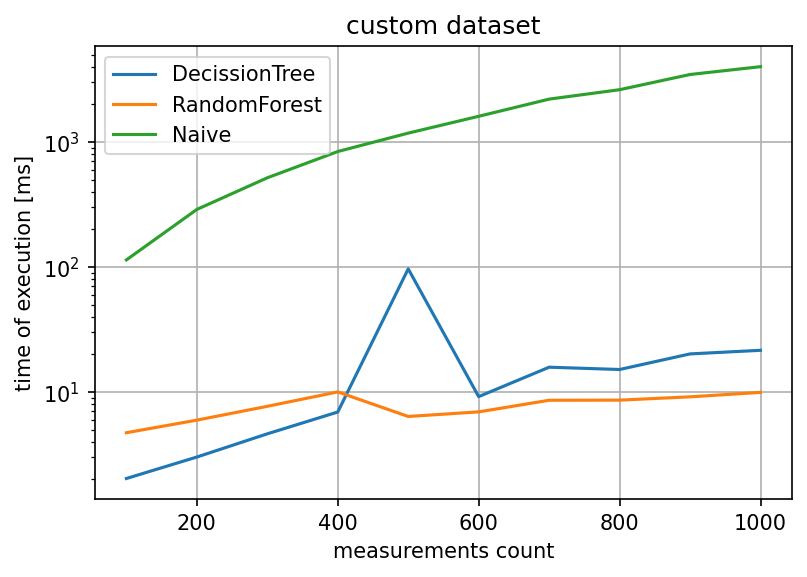

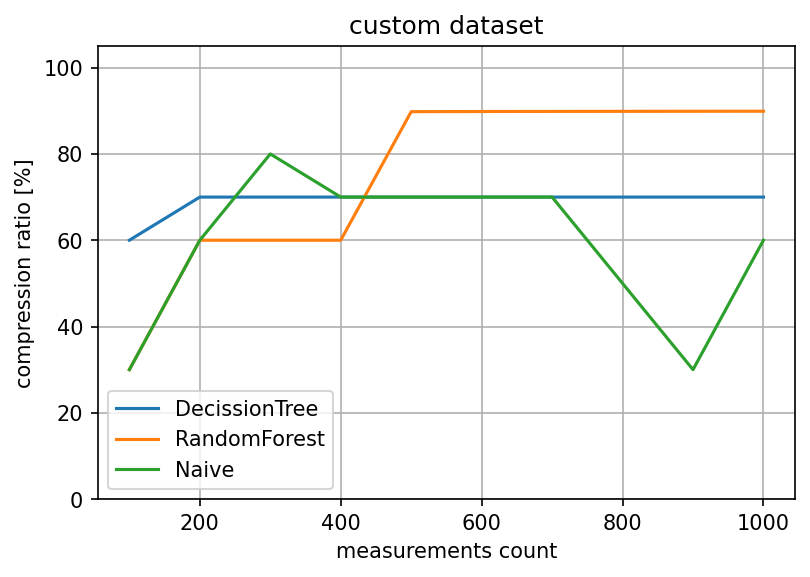

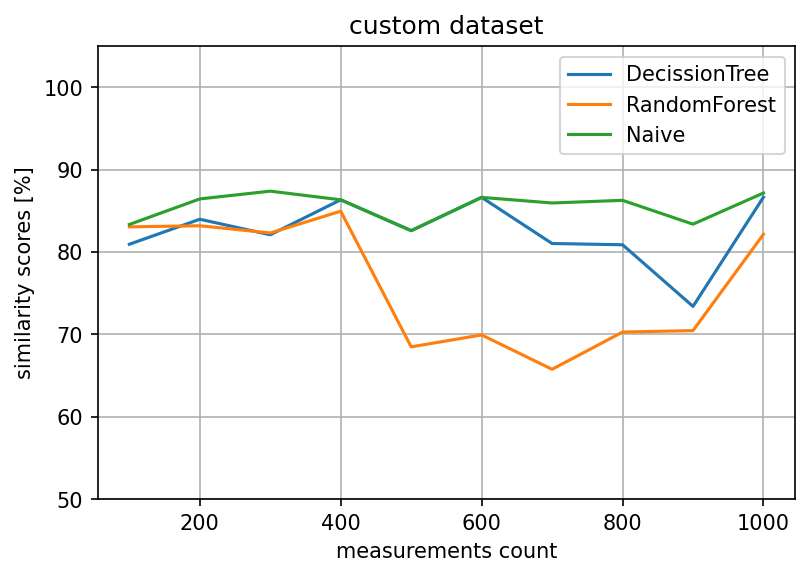

In [57]:
path = '../plot/strategy1RF'
ax = df.plot(x='datasize', y=['dt_time', 'rf_time', 'naive_time'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_yscale("log")
ax.set_title("custom dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("time of execution [ms]")
ax.figure.savefig(f'{path}/1a.png')

ax = df.plot(x='datasize', y=['dt_compression_ratio', 'rf_compression_ratio', 'naive_compression_ratio'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_ylim(0, 105)
ax.set_title("custom dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("compression ratio [%]")
ax.figure.savefig(f'{path}/2a.png')

# ax = df.plot(x='datasize', y=['dt_compressed_size', 'naive_compressed_size'], grid=True)
# ax.set_title("custom dataset")
# ax.set_xlabel("measurements count")
# ax.set_ylabel("compresed measurement set count")
# ax.figure.savefig(f'{path}/3a.png')

ax = df.plot(x='datasize', y=['dt_score', 'rf_score', 'naive_score'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_ylim(50, 105)
ax.set_title("custom dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("similarity scores [%]")
ax.figure.savefig(f'{path}/4a.png')

# ax = df.plot(x='datasize', y=['dt_cbor_compressed_size', 'naive_cbor_compressed_size', 'dt_json_compressed_size', 'naive_json_compressed_size'], grid=True, ylim=0)
# ax.set_title("custom dataset")
# ax.set_xlabel("measurements count")
# ax.set_ylabel("data size [B]")
# ax.figure.savefig(f'{path}/5a.png')


In [62]:
measurements1 = MeasurementProvider().json_to_measurements('stock1.json')
size1 = len(measurements1)
dataset = []
for i in range(10):
  start = int(random.randint(0, size1) * 0.7)
  end = random.randint(start, size1)
  dataset.append(measurements1[start:end])
df = run_measurements(dataset, lambda datasize: MeasurementProvider().json_to_measurements('stock1.json')[:datasize])

dt_method_selector (0.5, 1.0)
rf_method_selector (0.5, 1.0)
datasize,dt_time,naive_time,dt_compressed_size,naive_compressed_size,dt_compression_ratio,naive_compression_ratio,dt_method,naive_method,dt_score,naive_score,dt_cbor_original_size,dt_cbor_compressed_size,dt_cbor_compressratio,naive_cbor_original_size,naive_cbor_compressed_size,naive_cbor_compressratio,dt_json_original_size,dt_json_compressed_size,dt_json_compressratio,naive_json_original_size,naive_json_compressed_size,naive_json_compressratio
100,1.402099609375,110.02587890625,20,30,80.0,70.0,CompressPIP_PD_0.2,CompressPIP_ED_0.3,77.7198,84.9808,2529,769,0.6959272439699487,2529,989,0.608936338473705,5745,1452,0.7472584856396867,5710,1955,0.6576182136602452
200,2.346923828125,276.408935546875,20,20,90.0,90.0,CompressPIP_PD_0.1,CompressPIP_PD_0.1,91.8993,91.8993,4729,769,0.8373863396066822,4729,769,0.8373863396066822,11119,1405,0.8736397158017807,11119,1405,0.8736397158017807
300,3.525146484375,487.512939453125,30,60,90.0,80.0,

In [59]:
# df = pd.read_csv('./results1b.csv')
# df['dt_compression_ratio'] *= 100
# df['naive_compression_ratio'] *= 100

In [60]:
df2 = df
# df = df2
df

,datasize,dt_time,rf_time,naive_time,dt_compressed_size,rf_compressed_size,naive_compressed_size,dt_compression_ratio,rf_compression_ratio,naive_compression_ratio,dt_method,rf_method,naive_method,dt_score,rf_score,naive_score,dt_cbor_original_size,dt_cbor_compressed_size,dt_cbor_compressratio,rf_cbor_original_size,rf_cbor_compressed_size,rf_cbor_compressratio,naive_cbor_original_size,naive_cbor_compressed_size,naive_cbor_compressratio,dt_json_original_size,dt_json_compressed_size,dt_json_compressratio,rf_json_original_size,rf_json_compressed_size,rf_json_compressratio,naive_json_original_size,naive_json_compressed_size,naive_json_compressratio
0,100,1.611084,4.234131,106.371094,30,30,30,70.0,70.0,70.0,CompressPIP_ED_0.3,CompressPIP_ED_0.3,CompressPIP_ED_0.3,84.9808,84.9808,84.9808,2529,989,0.608936,2529,989,0.608936,2529,989,0.608936,5710,1955,0.657618,5710,1955,0.657618,5710,1955,0.657618
1,200,3.580322,6.261719,272.445801,20,20,20,90.0,90.0,90.0,CompressPIP_ED_0.1,CompressPIP_ED_0.1,CompressPIP_PD_0.1,86.9090,86.9090,91.8993,4729,769,0.837386,4729,769,0.837386,4729,769,0.837386,11122,1406,0.873584,11122,1406,0.873584,11119,1405,0.873640
2,300,5.230957,8.657959,480.338867,30,60,60,90.0,80.0,80.0,CompressPIP_ED_0.1,CompressPIP_ED_0.2,CompressPIP_PD_0.2,86.6118,86.0850,87.8324,6930,989,0.857287,6930,1649,0.762049,6930,1649,0.762049,16530,1929,0.883303,16529,3554,0.784984,16530,3555,0.784936
3,400,7.271240,10.705811,770.740967,40,80,80,90.0,80.0,80.0,CompressPIP_ED_0.1,CompressPIP_ED_0.2,CompressPIP_PD_0.2,83.5529,85.9474,87.3798,9130,1209,0.867579,9130,2089,0.771194,9130,2089,0.771194,22000,2521,0.885409,22000,4680,0.787273,21967,4651,0.788273
4,500,7.040039,12.495117,1043.639160,150,100,100,70.0,80.0,80.0,CompressPIP_PD_0.3,CompressPIP_ED_0.2,CompressPIP_PD_0.2,86.6313,87.0574,88.7511,11330,3629,0.679700,11330,2529,0.776787,11330,2529,0.776787,27366,8415,0.692502,27369,5709,0.791406,27366,5707,0.791457
5,600,8.446045,11.167969,1440.276123,180,180,60,70.0,70.0,90.0,CompressPIP_PD_0.3,CompressPIP_PD_0.3,CompressPIP_PD_0.1,85.5020,85.5020,88.1431,13530,4289,0.683001,13530,4289,0.683001,13530,1649,0.878123,32901,10114,0.692593,32901,10114,0.692593,32900,3615,0.890122
6,700,10.004150,18.513916,1938.066895,210,140,140,70.0,80.0,80.0,CompressPIP_PD_0.3,CompressPIP_ED_0.2,CompressPIP_PD_0.2,86.8413,86.9030,87.2276,15730,4949,0.685378,15730,3409,0.783280,15730,3409,0.783280,38265,11688,0.694551,38294,7920,0.793179,38264,7888,0.793853
7,800,11.466797,19.820801,2261.669189,240,160,240,70.0,80.0,70.0,CompressPIP_PD_0.3,CompressPIP_ED_0.2,CompressPIP_ED_0.3,84.7866,87.8337,88.0099,17930,5610,0.687117,17930,3849,0.785332,17930,5610,0.687117,43730,13372,0.694214,43701,8999,0.794078,43702,13341,0.694728
8,900,19.488037,20.502197,2844.160156,180,90,180,80.0,90.0,80.0,CompressPIP_ED_0.2,CompressPIP_ED_0.1,CompressPIP_ED_0.2,88.1140,87.2648,88.1140,20130,4289,0.786935,20130,2309,0.885296,20130,4289,0.786935,49223,10098,0.794852,49270,5258,0.893282,49223,10098,0.794852
9,1000,22.311035,23.060059,3391.396973,200,100,100,80.0,90.0,90.0,CompressPIP_ED_0.2,CompressPIP_ED_0.1,CompressPIP_PD_0.1,90.7842,89.9363,92.7007,22330,4729,0.788222,22330,2529,0.886744,22330,2529,0.886744,54744,11185,0.795685,54789,5788,0.894358,54744,5745,0.895057


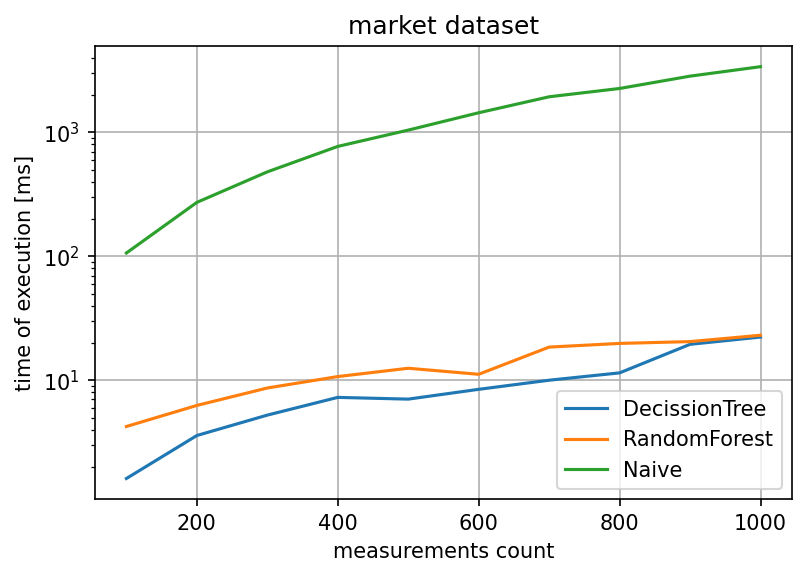

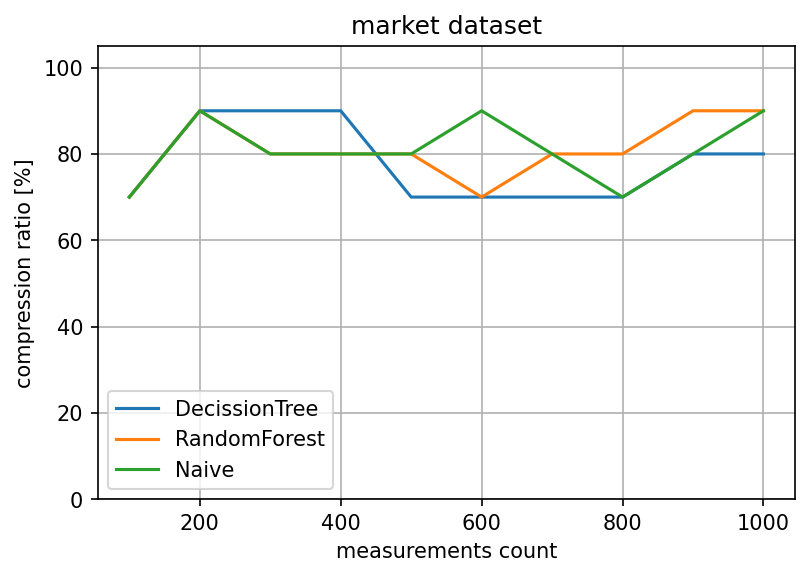

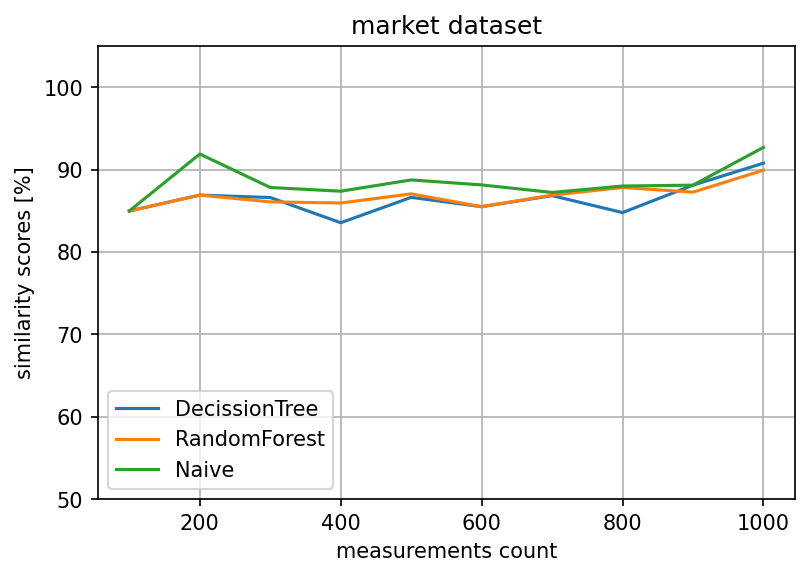

In [61]:
path = '../plot/strategy1RF'
ax = df.plot(x='datasize', y=['dt_time', 'rf_time', 'naive_time'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_yscale("log")
ax.set_title("market dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("time of execution [ms]")
ax.figure.savefig(f'{path}/1b.png')

ax = df.plot(x='datasize', y=['dt_compression_ratio', 'rf_compression_ratio', 'naive_compression_ratio'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_ylim(0, 105)
ax.set_title("market dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("compression ratio [%]")
ax.figure.savefig(f'{path}/2b.png')

# ax = df.plot(x='datasize', y=['dt_compressed_size', 'naive_compressed_size'], grid=True)
# ax.set_title("market dataset")
# ax.set_xlabel("measurements count")
# ax.set_ylabel("compresed measurement set count")
# ax.figure.savefig(f'{path}/3b.png')

ax = df.plot(x='datasize', y=['dt_score', 'rf_score', 'naive_score'], grid=True)
ax.legend(['DecissionTree', 'RandomForest', 'Naive'])
ax.set_ylim(50, 105)
ax.set_title("market dataset")
ax.set_xlabel("measurements count")
ax.set_ylabel("similarity scores [%]")
ax.figure.savefig(f'{path}/4b.png')

# ax = df.plot(x='datasize', y=['dt_cbor_compressed_size', 'naive_cbor_compressed_size', 'dt_json_compressed_size', 'naive_json_compressed_size'], grid=True, ylim=0)
# ax.set_title("market dataset")
# ax.set_xlabel("measurements count")
# ax.set_ylabel("data size [B]")
# ax.figure.savefig(f'{path}/5b.png')
